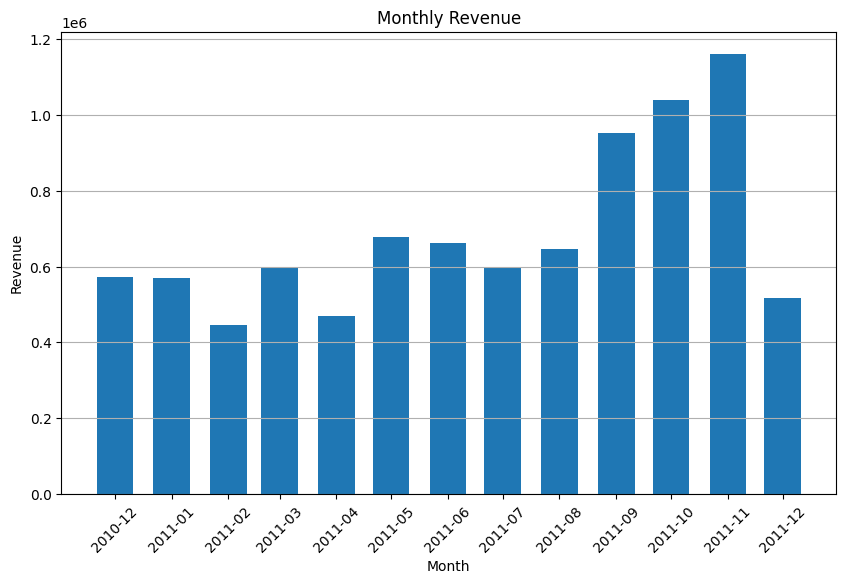

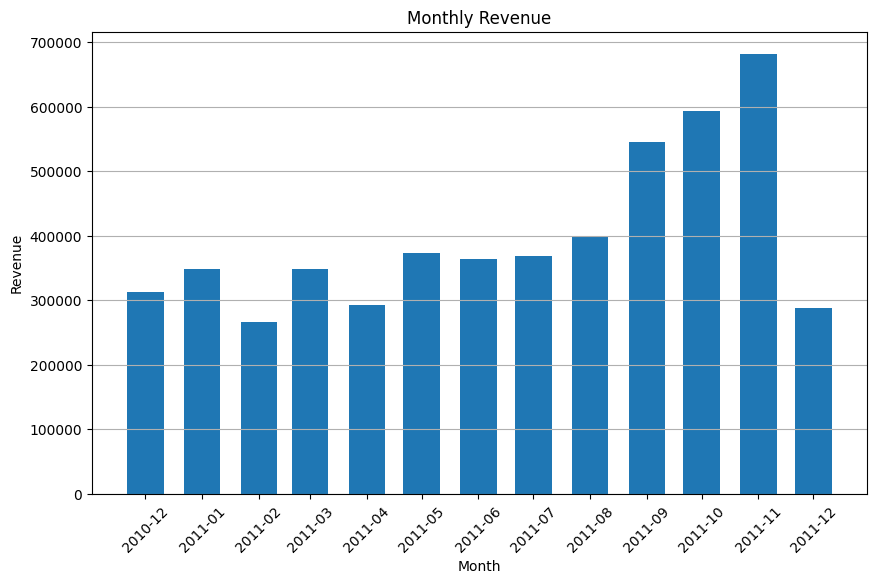

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/leonidastaliadouros/Documents/Datathon/cleaned_data.csv'
df = pd.read_csv(file_path)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['YearMonth'] = df['YearMonth'].dt.to_timestamp() 
grouped = df.groupby('YearMonth')
monthly_quantity = grouped['Quantity'].sum()
df['Revenue'] = df['Quantity'] * df['UnitPrice']
monthly_revenue = grouped['Revenue'].sum()
monthly_quantity = grouped['Quantity'].sum()
#print(monthly_quantity)
#print(monthly_revenue)
#df['Quantity'].plot(ylim=[0,10000])
#plt.show()
df.columns.to_list()

plt.figure(figsize=(10,6))
plt.bar(monthly_revenue.index, monthly_revenue.values, width=20)  
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')
plt.xticks(monthly_revenue.index, monthly_revenue.index.strftime('%Y-%m'), rotation=45)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10,6))
plt.bar(monthly_quantity.index, monthly_quantity.values, width=20)  
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')
plt.xticks(monthly_quantity.index, monthly_quantity.index.strftime('%Y-%m'), rotation=45)
plt.grid(axis='y')
plt.show()

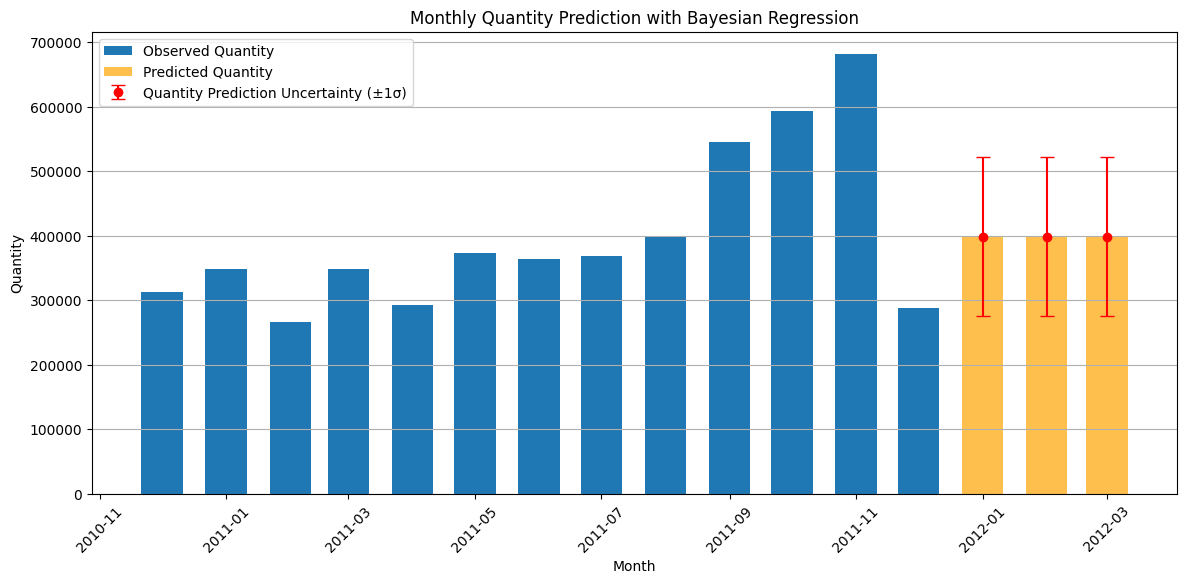

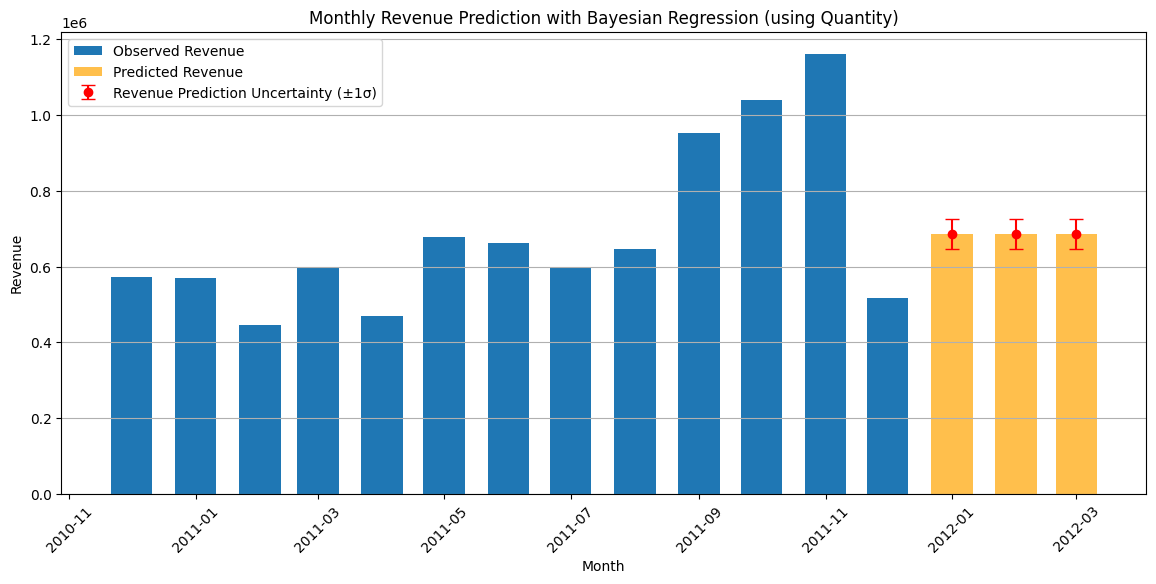

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge

#naive bayesian linear regression


X_q = np.arange(len(monthly_quantity)).reshape(-1, 1) 
y_q = monthly_quantity.values  

quantity_model = BayesianRidge(alpha_1=1e-6, alpha_2=1e-6, lambda_1=1e-6, lambda_2=1e-6) #parameters for non-informative priors, should be close to zero, otherwise biased priors are introduced
quantity_model.fit(X_q, y_q)

X_q_future = np.arange(len(monthly_quantity), len(monthly_quantity) + 3).reshape(-1, 1)
y_q_pred, y_q_std = quantity_model.predict(X_q_future, return_std=True)


X_r = monthly_quantity.values.reshape(-1, 1)  
y_r = monthly_revenue.values  
revenue_model = BayesianRidge(alpha_1=1e-6, alpha_2=1e-6, lambda_1=1e-6, lambda_2=1e-6)
revenue_model.fit(X_r, y_r)

y_r_pred, y_r_std = revenue_model.predict(y_q_pred.reshape(-1, 1), return_std=True)
full_dates = pd.date_range(start=monthly_revenue.index[0], periods=len(monthly_revenue) + 3, freq='MS')

plt.figure(figsize=(14, 6))
plt.bar(monthly_quantity.index, monthly_quantity.values, width=20, label='Observed Quantity')
plt.bar(full_dates[-3:], y_q_pred, width=20, color='orange', alpha=0.7, label='Predicted Quantity')
plt.errorbar(full_dates[-3:], y_q_pred, yerr=y_q_std, fmt='o', color='red', label='Quantity Prediction Uncertainty ', capsize=5)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Monthly Quantity Prediction - Bayesian Regression')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.show()


plt.figure(figsize=(14, 6))
plt.bar(monthly_revenue.index, monthly_revenue.values, width=20, label='Observed Revenue')
plt.bar(full_dates[-3:], y_r_pred, width=20, color='orange', alpha=0.7, label='Predicted Revenue')
plt.errorbar(full_dates[-3:], y_r_pred, yerr=y_r_std, fmt='o', color='red', label='Revenue Prediction Uncertainty', capsize=5)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Prediction - Bayesian Regression')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.show()


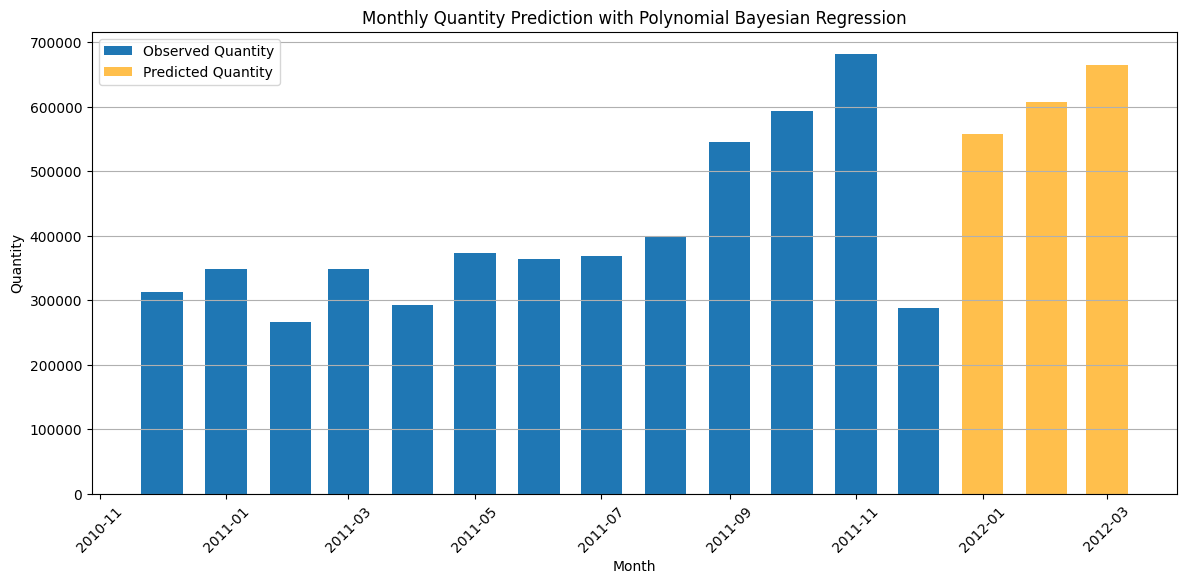

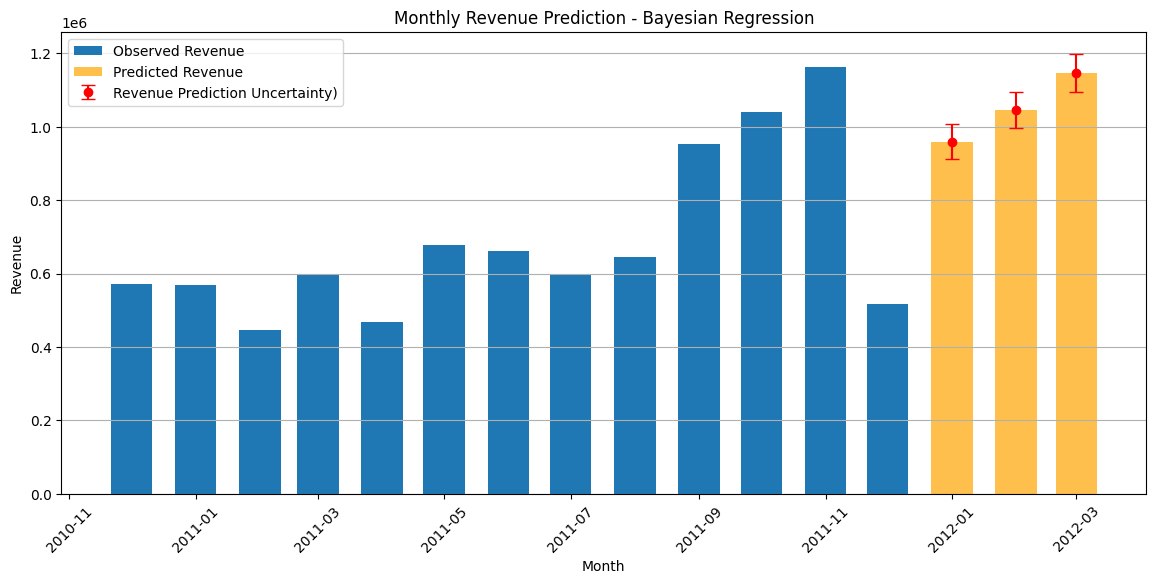

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#naive bayesian non-linear regression 

X_q = np.arange(len(monthly_quantity)).reshape(-1, 1)  
y_q = monthly_quantity.values

quantity_model = make_pipeline(PolynomialFeatures(degree=3), BayesianRidge(alpha_1=1e-6, alpha_2=1e-6, lambda_1=1e-6, lambda_2=1e-6))

quantity_model.fit(X_q, y_q)
X_q_future = np.arange(len(monthly_quantity), len(monthly_quantity) + 3).reshape(-1, 1)
y_q_pred = quantity_model.predict(X_q_future)
X_r = monthly_quantity.values.reshape(-1, 1)  
y_r = monthly_revenue.values 

revenue_model = BayesianRidge(alpha_1=1e-6, alpha_2=1e-6, lambda_1=1e-6, lambda_2=1e-6) #parameters for non-informative priors, should be close to zero
revenue_model.fit(X_r, y_r)

y_r_pred, y_r_std = revenue_model.predict(y_q_pred.reshape(-1, 1), return_std=True)
full_dates = pd.date_range(start=monthly_revenue.index[0], periods=len(monthly_revenue) + 3, freq='MS')

plt.figure(figsize=(14, 6))
plt.bar(monthly_quantity.index, monthly_quantity.values, width=20, label='Observed Quantity')
plt.bar(full_dates[-3:], y_q_pred, width=20, color='orange', alpha=0.7, label='Predicted Quantity')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Monthly Quantity Prediction with Polynomial Bayesian Regression')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.show()

# Plot Revenue prediction
plt.figure(figsize=(14, 6))
plt.bar(monthly_revenue.index, monthly_revenue.values, width=20, label='Observed Revenue')
plt.bar(full_dates[-3:], y_r_pred, width=20, color='orange', alpha=0.7, label='Predicted Revenue')
plt.errorbar(full_dates[-3:], y_r_pred, yerr=y_r_std, fmt='o', color='red', label='Revenue Prediction Uncertainty)', capsize=5)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Prediction - Bayesian Regression')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.show()


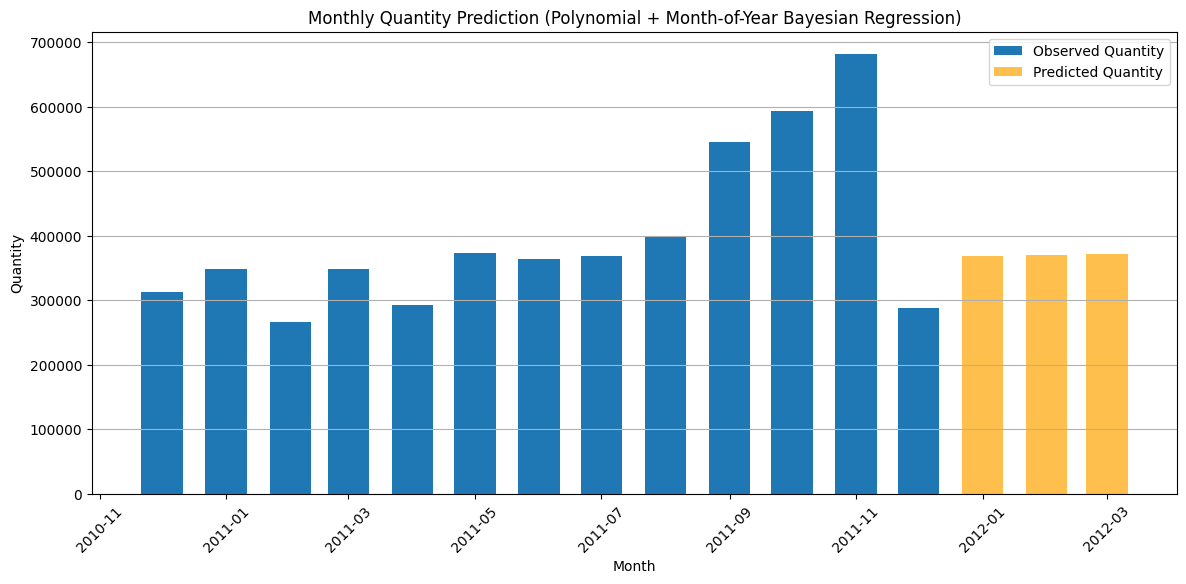

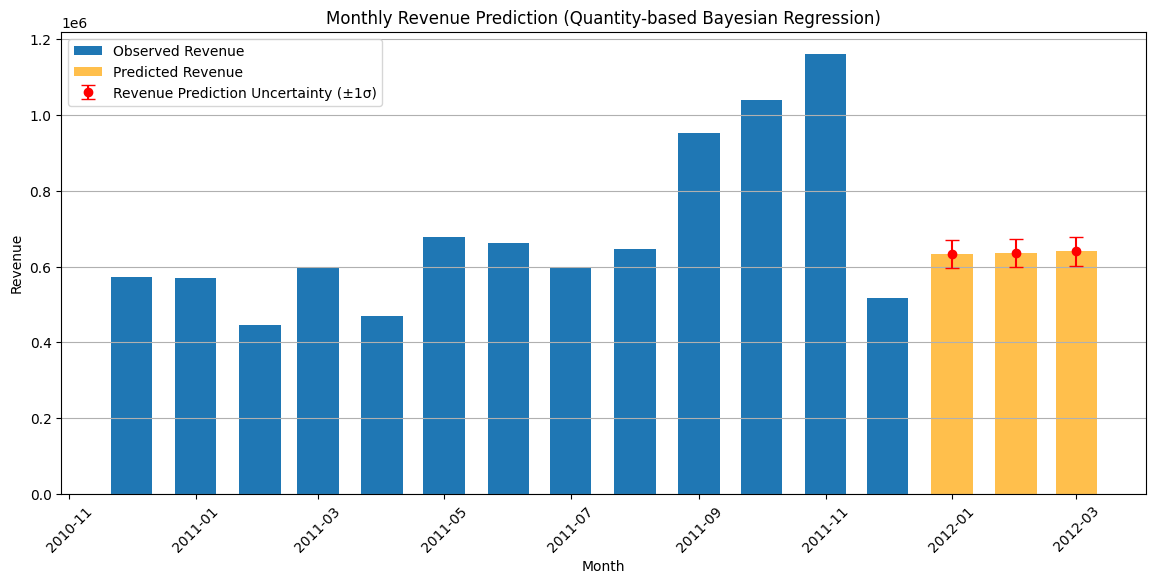

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline



month_numbers = monthly_quantity.index.month.values.reshape(-1, 1)  # Month (1-12)
X_q = month_numbers
y_q = monthly_quantity.values

quantity_model = make_pipeline(
    PolynomialFeatures(degree=2),
    BayesianRidge(alpha_1=1e-6, alpha_2=1e-6, lambda_1=1e-6, lambda_2=1e-6)
)

quantity_model.fit(X_q, y_q)
last_month = monthly_quantity.index[-1].month
future_months = [(last_month + i - 1) % 12 + 1 for i in range(1, 4)]  
X_q_future = np.array(future_months).reshape(-1, 1)
y_q_pred = quantity_model.predict(X_q_future)


X_r = monthly_quantity.values.reshape(-1, 1)  
y_r = monthly_revenue.values

revenue_model = BayesianRidge(alpha_1=1e-6, alpha_2=1e-6, lambda_1=1e-6, lambda_2=1e-6)
revenue_model.fit(X_r, y_r)

y_r_pred, y_r_std = revenue_model.predict(y_q_pred.reshape(-1, 1), return_std=True)
full_dates = pd.date_range(start=monthly_revenue.index[0], periods=len(monthly_revenue)+3, freq='MS')

plt.figure(figsize=(14, 6))
plt.bar(monthly_quantity.index, monthly_quantity.values, width=20, label='Observed Quantity')
plt.bar(full_dates[-3:], y_q_pred, width=20, color='orange', alpha=0.7, label='Predicted Quantity')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Monthly Quantity Prediction (Polynomial + Month-of-Year Bayesian Regression)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
plt.bar(monthly_revenue.index, monthly_revenue.values, width=20, label='Observed Revenue')
plt.bar(full_dates[-3:], y_r_pred, width=20, color='orange', alpha=0.7, label='Predicted Revenue')
plt.errorbar(full_dates[-3:], y_r_pred, yerr=y_r_std, fmt='o', color='red', label='Revenue Prediction Uncertainty', capsize=5)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Prediction (Quantity-based Bayesian Regression)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.show()
